In [ ]:
#%% README

In [2]:
import sys
print(sys.version_info)
print(sys.prefix)

sys.version_info(major=3, minor=12, micro=1, releaselevel='final', serial=0)
c:\Users\mart229\AppData\Local\anaconda3\envs\nei


In [3]:
!python --version

Python 3.12.1


In [ ]:
#!python -m venv red
#!red\Scripts\activate

In [ ]:
#%% install missing packages
#!pip freeze > required_packages.txt
#!pip install -r required_packages.txt

In [1]:
#%%
import os
from glob import glob
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import statistics as st
import ipywidgets as widgets
from ipywidgets import VBox
from functools import reduce
import UPGRADE_E_Data as ue # read functions from .py files into notebook

In [ ]:
#from ipyfilechooser import FileChooser

In [2]:
#%% set custom display options for Notebook
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 6)

In [3]:
#%% set directory of datasets, check to make sure user working directory is correct
path, allfiles = ue.set_path()

In [4]:
#%% select data to visualize
checked_boxes = ue.choose_data(path, allfiles)

In [18]:
# read in selected datasets and merge
datasets = ue.selected_datasets(checked_boxes)
df = ue.merge_datasets(datasets, path)
#display(df)

Selected datasets to merge: 
 ['home_demographics.csv'] 



In [19]:
column_categories_dict = ue.manually_reorder(ue.find_unique_categories(df))
#column_categories_dict

In [20]:
#%% assign each column to a data type list
binary_categories, numeric_categories, ordinal_categories, nominal_categories = ue.assign_data_type(column_categories_dict)

print("Binary: ", binary_categories)
print("Numeric: ", numeric_categories)
print("Ordinal: ", ordinal_categories)
print("Nominal: ", nominal_categories)

Binary:  ['race_americanindianoralaskannati', 'race_asian', 'race_blackorafricanamerican', 'race_middleeasternornorthafrican', 'race_nativehawaiianorotherpacifi', 'race_otherpleasespecify', 'race_prefernottosay', 'race_white']
Numeric:  ['children', 'age18_64', 'age65plus', 'hh_size2']
Ordinal:  ['reported_age', 'education', 'hhincome', 'mortgagerentbins', 'homeyrs', 'yrbuilt', 'homesqft', 'energyexpenses']
Nominal:  ['own_rent', 'userlanguage', 'hometype', 'gender', 'ethnicity_all', 'mortgagerent', 'heatsource', 'waterheatsource', 'electricgasbill']


In [21]:
#%% group data by chosen column
group_by_column = "own_rent"
groups = ue.split_data(df, group_by_column)
print("groups: ", [key for key in groups.keys()])

groups:  ['Own', 'Rent']


In [22]:
# count occurences of each category and group by chosen column
data_groups_dicts = ue.data_grouper(groups, column_categories_dict)
#data_groups_dicts

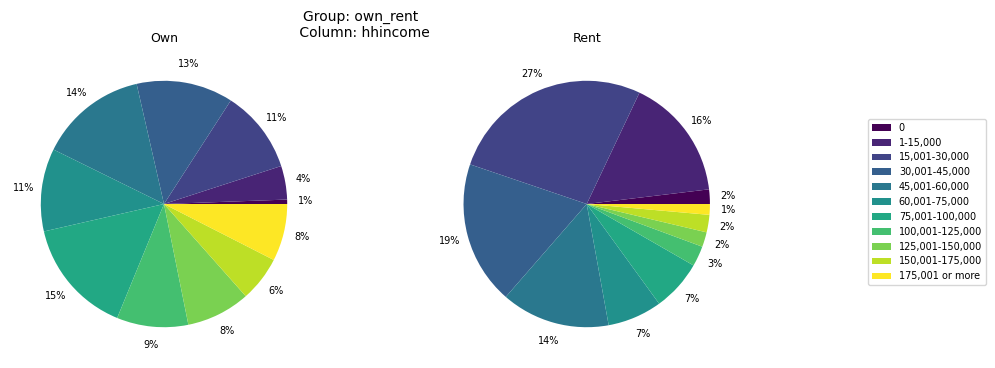

In [23]:
compare_column = "hhincome"
ue.pie_plotter(data_groups_dicts, compare_column, group_by_column, binary_categories)

In [ ]:
#TODO
# drop down menu for selecting where to output graphs
# stacked column charts
# test for large NAs in certain datasets
# add additional variables to ordinal data list
# route data categories to stats analyses
# debug groupby numerical error

# compare with Census data
# add error handling